<a href="https://colab.research.google.com/github/VenkateshDas/NaturalLanguageProcessing/blob/master/Media_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Media Analysis of India on German Media (newspapers) 

### Media Article URL's to scrape

1. https://www.zeit.de/gesellschaft/zeitgeschehen/2019-12/einbuergerungsgesetz-indien-proteste-demonstrationen-tote
2. https://www.zeit.de/campus/2019-12/studentenproteste-indien-einwanderungsgesetz-staatsbuergerschaftsreform
3. https://www.zeit.de/politik/ausland/2019-12/indien-neu-delhi-proteste-staatsbuergerschaftsreform
4. https://www.faz.net/aktuell/wirtschaft/wachstumskrise-ganz-indien-ist-in-protestlaune-16575265.html
5. https://www.faz.net/aktuell/wirtschaft/millionen-inder-streiken-gegen-wirtschaftspolitik-16571450.html
6. https://www.fr.de/politik/demokratie-gefahr-13459676.html
7. https://www.spiegel.de/politik/ausland/muslime-ausgeschlossen-grossdemonstrationen-gegen-indisches-staatsbuergerschaftsrecht-a-1303600.html
8. https://www.spiegel.de/politik/indien-premier-narendra-modi-ein-nationalist-und-seine-200-millionen-feinde-a-00000000-0002-0001-0000-000168763995
9. https://www.spiegel.de/politik/ausland/indien-regierung-entzieht-jammu-und-kaschmir-den-sonderstatus-a-1280541.html
10. https://www.spiegel.de/politik/ausland/indien-hebt-sonderstatus-fuer-kaschmir-in-der-verfassung-auf-a-1280455.html
11. https://www.spiegel.de/international/world/deathly-silence-an-inside-look-at-kashmir-a-1296450.html
12. https://www.dw.com/en/india-citizenship-law-protests-spearheaded-by-women/a-52108903
13. https://www.dw.com/en/fresh-student-protests-hit-india-over-university-attack/a-51897307
14. https://www.dw.com/en/indias-new-citizenship-law-ignites-religious-tensions/g-51809014
15. https://www.dw.com/en/indian-state-shuts-down-internet-ahead-of-protests/a-51807095
16. https://www.dw.com/en/india-curfew-internet-closures-as-deadly-citizenship-protests-continue/a-51747818
16. https://www.dw.com/en/india-stripped-kashmir-of-autonomy-to-end-separatism-modi-says/a-49948685
17. https://www.dw.com/en/kashmir-lockdown-an-uneasy-calm-prevails/a-49965552



In [1]:
# not accessible : 'https://www.faz.net/aktuell/wirtschaft/wachstumskrise-ganz-indien-ist-in-protestlaune-16575265.html' - 2 paragraphs
# 'https://www.zeit.de/campus/2019-12/studentenproteste-indien-einwanderungsgesetz-staatsbuergerschaftsreform'

zeit_url = ['https://www.zeit.de/gesellschaft/zeitgeschehen/2019-12/einbuergerungsgesetz-indien-proteste-demonstrationen-tote',
            'https://www.zeit.de/politik/ausland/2019-12/indien-neu-delhi-proteste-staatsbuergerschaftsreform']
faz_url = ['https://www.faz.net/aktuell/wirtschaft/wachstumskrise-ganz-indien-ist-in-protestlaune-16575265.html',
           'https://www.faz.net/aktuell/wirtschaft/millionen-inder-streiken-gegen-wirtschaftspolitik-16571450.html']
fr_url = ['https://www.fr.de/politik/demokratie-gefahr-13459676.html']
spiegel_url = ['https://www.spiegel.de/politik/ausland/muslime-ausgeschlossen-grossdemonstrationen-gegen-indisches-staatsbuergerschaftsrecht-a-1303600.html',
               'https://www.spiegel.de/politik/ausland/indien-regierung-entzieht-jammu-und-kaschmir-den-sonderstatus-a-1280541.html',
               'https://www.spiegel.de/politik/ausland/indien-hebt-sonderstatus-fuer-kaschmir-in-der-verfassung-auf-a-1280455.html',
               'https://www.spiegel.de/international/world/deathly-silence-an-inside-look-at-kashmir-a-1296450.html']
dw_url = ['https://www.dw.com/en/india-citizenship-law-protests-spearheaded-by-women/a-52108903',
          'https://www.dw.com/en/fresh-student-protests-hit-india-over-university-attack/a-51897307',
          'https://www.dw.com/en/indias-new-citizenship-law-ignites-religious-tensions/g-51809014',
          'https://www.dw.com/en/indian-state-shuts-down-internet-ahead-of-protests/a-51807095',
          'https://www.dw.com/en/india-curfew-internet-closures-as-deadly-citizenship-protests-continue/a-51747818',
          'https://www.dw.com/en/india-stripped-kashmir-of-autonomy-to-end-separatism-modi-says/a-49948685',
          'https://www.dw.com/en/kashmir-lockdown-an-uneasy-calm-prevails/a-49965552']

url_lists = {'zeit':zeit_url,'faz':faz_url,'fr':fr_url,'spiegel':spiegel_url,'dw':dw_url}

### Install libraries

In [2]:
!pip install beautifulsoup4

In [3]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [

In [4]:
!pip install spiegel-scraper

     |████████████████████████████████| 286kB 11.2MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 


In [56]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 11.9MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 7.4MB 16.9MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=3ff01357c5a6a79c8cbdf435ea5dbcc1eaba45e388512d2a506a7d48ce4a85b2
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3358 sha256=46eb9896a78628af3897dc8cfdfc329f9154d1098350373ee25bb33b3b44e5cc
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=326f6eaaa059922ef66da0032b6b0612d5ca79ed514a03b8926b84515e860ba5
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for sgmllib3k: fil

In [6]:
#Sentiment Analysis 

!pip install germansentiment
!pip install vader-multi

     |████████████████████████████████| 1.8MB 11.4MB/s 
     |████████████████████████████████| 890kB 50.3MB/s 
     |████████████████████████████████| 2.9MB 43.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=1fd18497591e14879b62c1e0ded9001ff8b8115a72ab22fd972913ba84a500b7
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 133kB 12.0MB/s 


### Importing Libraries

In [68]:
# Import necessary libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import date
import spiegel_scraper as spon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from germansentiment import SentimentModel
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# configuration
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',options=options)


nltk.download('stopwords')
german_stop_words = stopwords.words('german')
english_stop_word = stopwords.words('english')
stopwords = german_stop_words + english_stop_word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Media Article Ectraction (Scraping)

In [8]:
def extract_zeit(res):

    zeit_dict = {}
    para_list = []
    
    title_tags = res.findAll("span", {"class": "article-heading__title"})
    summary_tags = res.findAll('div',{'class': 'summary'})
    times = res.findAll('time',{'class':'metadata__date'})
    para_tags = res.findAll('p',{'class':'paragraph article__item'})
    for title_tag in title_tags:
        title = title_tag.getText()
        zeit_dict['title'] = title
    for summary_tag in summary_tags:
        summary = summary_tag.getText()
        zeit_dict['summary'] = summary
    for para_tag in para_tags:
        para_list.append(para_tag.getText())
    for time in times:
        t = time.getText()
        zeit_dict['time'] = t
    
    content = " ".join(para_list)
    zeit_dict['content'] = content
    
    return zeit_dict
    
def extract_faz(res):

    try: 
        faz_dict = {}
        para_list = []

        title_tags = res.findAll("span", {"class": "atc-HeadlineText"})
        summary_tags = res.findAll('p',{'class': 'atc-IntroText'})
        times = res.findAll('time',{'class':'atc-MetaTime'})
        first_para_tags = res.findAll('p',{'class':'First atc-TextParagraph'})
        para_tags = res.findAll('p',{'class':'atc-TextParagraph'})
        for title_tag in title_tags:
            title = title_tag.getText()
            faz_dict['title'] = title
        for summary_tag in summary_tags:
            summary = summary_tag.getText()
            faz_dict['summary'] = summary
        for first_para in first_para_tags:
            f_content = first_para.getText()
        for para_tag in para_tags:
            para_list.append(para_tag.getText())
        for time in times:
            t = time.getText()
            faz_dict['time'] = t
        
        content = " ".join(para_list)
        faz_dict['content'] = f_content+content
        
    except: 
        print("Error")

    return faz_dict


def extract_fr(url,res):

    try : 
        fr_dict = {}
        title_tags = res.findAll("h2", {"class": "id-Article-headline "})
        summary_tags = res.findAll('p',{'class': 'id-Article-content-item id-Article-content-item-summary'})
        times = res.findAll('span',{'class':'id-DateTime-date'})

        for title_tag in title_tags:
            title = title_tag.getText()
            fr_dict['title'] = title
        for summary_tag in summary_tags:
            summary = summary_tag.getText()
            fr_dict['summary'] = summary
        for time in times:
            t = time.getText()
            fr_dict['time'] = t
            
        
        browser.get(url)
        para_list = []
        i = 2
        while i <=15:
            p = browser.find_element_by_xpath('//*[@id="id-js-Story"]/div[2]/p['+str(i)+']')
            para_list.append(p.text)
            i = i + 1
        content = " ".join(para_list)
        fr_dict['content'] = content

    except Error as e: 
        print(e)
    
    return fr_dict
    

def extract_spiegel(url):

    try : 
        spiegel_dict = {}
        article_html = spon.article.html_by_url(url)
        article_from_html = spon.article.scrape_html(article_html)
        title = article_from_html['headline']['main']
        time = article_from_html['date_published']
        summary = article_from_html['intro']
        content = article_from_html['text']

        spiegel_dict = {'time':time,'title':title,'summary':summary,'content':content}

    except:
        print("Error")

    return spiegel_dict

def extract_dw(url,res):

    try : 
    
        dw_dict = {}

        browser.get(url)
        t = browser.find_element_by_xpath('//*[@id="bodyContent"]/div[2]/div/ul/li[1]')
        time = t.text
        dw_dict['time'] = time
        
        title_tags = res.findAll("h1")
        summary_tags = res.findAll('p',{'class': 'intro'})
        for title_tag in title_tags:
            title = title_tag.getText()
            dw_dict['title'] = title
        for summary_tag in summary_tags:
            summary = summary_tag.getText()
            dw_dict['summary'] = summary
        
        para_list = []
        i = 1

        while i:

            try:
                p = browser.find_element_by_xpath('//*[@id="bodyContent"]/div[1]/div[3]/div/p['+str(i)+']')
                para = p.text
                para_list.append(p.text)
                i = i + 1
            except:
                break
        content = " ".join(para_list)
        dw_dict['content'] = content

    except :
        print("Error")

    return dw_dict



In [9]:
url_lists = {'zeit':zeit_url,'faz':faz_url,'fr':fr_url,'spiegel':spiegel_url,'dw':dw_url}
columns = ['time','title','summary','content']

media_list = []
times_list = []
titles_list = []
summary_list = []
content_list = []


for media,urls in url_lists.items():

    print(media)

    for url in urls:

        try:

            html = urlopen(url)

        except HTTPError as e:

            print(e)

        except URLError:

            print("Server down or incorrect domain")

        else:

            res = BeautifulSoup(html.read(),"html5lib")

            if media == 'zeit':
                zeit_dict = extract_zeit(res)
                times_list.append(zeit_dict['time'])
                media_list.append(media)
                titles_list.append(zeit_dict['title'])
                summary_list.append(zeit_dict['summary'])
                content_list.append(zeit_dict['content'])
            elif media == 'faz':
                faz_dict = extract_faz(res)
                times_list.append(faz_dict['time'])
                media_list.append(media)
                titles_list.append(faz_dict['title'])
                summary_list.append(faz_dict['summary'])
                content_list.append(faz_dict['content'])
                
            elif media == 'fr':
                fr_dict = extract_fr(url,res)
                times_list.append(fr_dict['time'])
                media_list.append(media)
                titles_list.append(fr_dict['title'])
                summary_list.append(fr_dict['summary'])
                content_list.append(fr_dict['content'])
                
            elif media == 'spiegel':
                spiegel_dict = extract_spiegel(url)
                times_list.append(spiegel_dict['time'])
                media_list.append(media)
                titles_list.append(spiegel_dict['title'])
                summary_list.append(spiegel_dict['summary'])
                content_list.append(spiegel_dict['content'])
                
            elif media== 'dw':
                dw_dict = extract_dw(url,res)
                times_list.append(dw_dict['time'])
                media_list.append(media)
                titles_list.append(dw_dict['title'])
                summary_list.append(dw_dict['summary'])
                content_list.append(dw_dict['content'])


zeit
faz
fr
spiegel
dw


In [10]:
articles_dataframe = pd.DataFrame({'time':times_list,'media':media_list,'title':titles_list,'summary':summary_list,'content':content_list})
articles_dataframe

time  ...                                            content
0                   21. Dezember 2019, 14:15 Uhr  ...  Bei den Protesten gegen ein neues Staatsbürger...
1                    16. Dezember 2019, 0:57 Uhr  ...  Bei Protesten gegen die indische Staatsbürgers...
2   \n\n\t\t\t\t\t\t11.01.2020-13:03\n\t\t\t\t\t  ...  Die großen Gewerkschaften Indiens haben in den...
3   \n\n\t\t\t\t\t\t08.01.2020-17:27\n\t\t\t\t\t  ...  Mehrere Millionen Arbeitnehmer haben in Indien...
4                                     22.01.2020  ...  Sie kamen maskiert und mit Eisenstangen bewaff...
5                      2020-01-03T18:02:00+01:00  ...  Zehntausende Menschen haben in Indien landeswe...
6                      2019-08-05T16:43:00+02:00  ...  Die Straßen von Srinagar im indisch kontrollie...
7                      2019-08-05T08:49:00+02:00  ...  Indiens Innenminister Amit Shah hat im Parlame...
8                      2019-11-15T12:43:52+01:00  ...  The first thing that comes as a surprise to a ...
9                                Date 22.01.2020  ...  Shaheen Bagh, a working-class Muslim-majority ...
10                               Date 06.01.2020  ...  Fresh student protests are taking place across...
11                               Date 27.12.2019  ...                                                   
12                               Date 27.12.2019  ...  Authorities shut down mobile internet and text...
13                               Date 20.12.2019  ...  Authorities in India imposed a curfew in the s...
14                               Date 08.08.2019  ...  Indian Prime Minister Narendra Modi said he wa...
15                               Date 09.08.2019  ...  An eerie silence prevails in the Kashmir valle...

[16 rows x 5 columns]

In [11]:
articles_dataframe = articles_dataframe.drop(labels='time',axis=1)
articles_dataframe['content'].iloc[11] = 'No content'

In [12]:
articles_dataframe

media  ...                                            content
0      zeit  ...  Bei den Protesten gegen ein neues Staatsbürger...
1      zeit  ...  Bei Protesten gegen die indische Staatsbürgers...
2       faz  ...  Die großen Gewerkschaften Indiens haben in den...
3       faz  ...  Mehrere Millionen Arbeitnehmer haben in Indien...
4        fr  ...  Sie kamen maskiert und mit Eisenstangen bewaff...
5   spiegel  ...  Zehntausende Menschen haben in Indien landeswe...
6   spiegel  ...  Die Straßen von Srinagar im indisch kontrollie...
7   spiegel  ...  Indiens Innenminister Amit Shah hat im Parlame...
8   spiegel  ...  The first thing that comes as a surprise to a ...
9        dw  ...  Shaheen Bagh, a working-class Muslim-majority ...
10       dw  ...  Fresh student protests are taking place across...
11       dw  ...                                         No content
12       dw  ...  Authorities shut down mobile internet and text...
13       dw  ...  Authorities in India imposed a curfew in the s...
14       dw  ...  Indian Prime Minister Narendra Modi said he wa...
15       dw  ...  An eerie silence prevails in the Kashmir valle...

[16 rows x 4 columns]

### Data Cleaning (Very basic) 

In [13]:
def clean_txt(input_txt):

    #removing hashtags,emojis,stopwords
    input_txt=re.sub(r'#[\w]*','',input_txt)
    input_txt=input_txt.encode("ascii","ignore")
    input_txt=input_txt.decode()

    #removing punctuation,numbers,whitespace,tabs  
    res=re.sub(r'[^\w\s]', '', input_txt.lower())
    res=re.sub('\s+',' ',res)
    res=re.sub('\t+','',res)
    ##removing links
    res=re.sub(r'https[\w]*', '', res, flags=re.MULTILINE)

    return res

In [14]:
articles_dataframe['clean_title'] = np.vectorize(clean_txt)(articles_dataframe['title'])
articles_dataframe['clean_summary'] = np.vectorize(clean_txt)(articles_dataframe['summary'])
articles_dataframe['clean_content'] = np.vectorize(clean_txt)(articles_dataframe['content'])
articles_dataframe

media  ...                                      clean_content
0      zeit  ...  bei den protesten gegen ein neues staatsbrgers...
1      zeit  ...  bei protesten gegen die indische staatsbrgersc...
2       faz  ...  die groen gewerkschaften indiens haben in den ...
3       faz  ...  mehrere millionen arbeitnehmer haben in indien...
4        fr  ...  sie kamen maskiert und mit eisenstangen bewaff...
5   spiegel  ...  zehntausende menschen haben in indien landeswe...
6   spiegel  ...  die straen von srinagar im indisch kontrollier...
7   spiegel  ...  indiens innenminister amit shah hat im parlame...
8   spiegel  ...  the first thing that comes as a surprise to a ...
9        dw  ...  shaheen bagh a workingclass muslimmajority nei...
10       dw  ...  fresh student protests are taking place across...
11       dw  ...                                         no content
12       dw  ...  authorities shut down mobile internet and text...
13       dw  ...  authorities in india imposed a curfew in the s...
14       dw  ...  indian prime minister narendra modi said he wa...
15       dw  ...  an eerie silence prevails in the kashmir valle...

[16 rows x 7 columns]

In [16]:
def stop_word_removal(x):
    res=re.sub(r'[^\w\s]', '', x.lower())
    text=re.sub('\s+',' ',res)
    text=re.sub('\t+','',text)
    token = wordpunct_tokenize(text)
    return [w for w in token if not w in stopwords]

In [17]:
articles_dataframe['cleaned_tokenised_content'] =articles_dataframe['content'].apply(stop_word_removal)
articles_dataframe['cleaned_tokenised_summary'] =articles_dataframe['summary'].apply(stop_word_removal)
articles_dataframe['cleaned_tokenised_title'] =articles_dataframe['title'].apply(stop_word_removal)

In [18]:
articles_dataframe

media  ...                            cleaned_tokenised_title
0      zeit  ...                [mehr, 20, tote, protesten, indien]
1      zeit  ...   [dutzende, verletzte, ausschreitungen, neudelhi]
2       faz  ...                               [land, protestlaune]
3       faz  ...   [millionen, inder, streiken, wirtschaftspolitik]
4        fr  ...                             [kampf, gandhis, erbe]
5   spiegel  ...  [muslime, ausgeschlossen, großdemonstrationen,...
6   spiegel  ...  [unruheregion, indien, verschärft, kaschmirkon...
7   spiegel  ...  [konflikt, pakistan, indien, hebt, sonderstatu...
8   spiegel  ...          [deathly, silence, inside, look, kashmir]
9        dw  ...  [india, citizenship, law, protests, spearheade...
10       dw  ...  [fresh, student, protests, hit, india, univers...
11       dw  ...  [indias, new, citizenship, law, ignites, relig...
12       dw  ...  [indian, state, shuts, internet, ahead, protests]
13       dw  ...  [india, curfew, internet, closures, deadly, ci...
14       dw  ...  [india, stripped, kashmir, autonomy, end, sepa...
15       dw  ...        [kashmir, lockdown, uneasy, calm, prevails]

[16 rows x 10 columns]

In [19]:
def join_list(x):
    return ' '.join(x)

articles_dataframe['joined_content'] =articles_dataframe['cleaned_tokenised_content'].apply(join_list)
articles_dataframe['joined_summary'] =articles_dataframe['cleaned_tokenised_summary'].apply(join_list)
articles_dataframe['joined_title'] =articles_dataframe['cleaned_tokenised_title'].apply(join_list)

In [20]:
articles_dataframe

media  ...                                       joined_title
0      zeit  ...                      mehr 20 tote protesten indien
1      zeit  ...        dutzende verletzte ausschreitungen neudelhi
2       faz  ...                                  land protestlaune
3       faz  ...        millionen inder streiken wirtschaftspolitik
4        fr  ...                                 kampf gandhis erbe
5   spiegel  ...  muslime ausgeschlossen großdemonstrationen neu...
6   spiegel  ...    unruheregion indien verschärft kaschmirkonflikt
7   spiegel  ...  konflikt pakistan indien hebt sonderstatus kas...
8   spiegel  ...                deathly silence inside look kashmir
9        dw  ...   india citizenship law protests spearheaded women
10       dw  ...  fresh student protests hit india university at...
11       dw  ...  indias new citizenship law ignites religious t...
12       dw  ...         indian state shuts internet ahead protests
13       dw  ...  india curfew internet closures deadly citizens...
14       dw  ...  india stripped kashmir autonomy end separatism...
15       dw  ...              kashmir lockdown uneasy calm prevails

[16 rows x 13 columns]

### Media vs Number of Articles

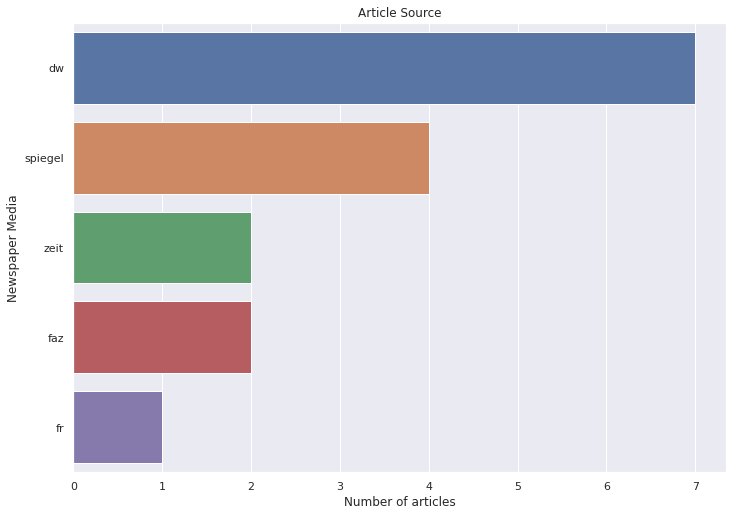

In [15]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="media",  data=articles_dataframe,order=articles_dataframe['media'].value_counts().iloc[:5].index)
plt.title("Article Source")
plt.ylabel("Newspaper Media")
plt.xlabel("Number of articles")
plt.show()

### Unigram, Bigram and Trigram Analysis on Overall media (on given articles) 

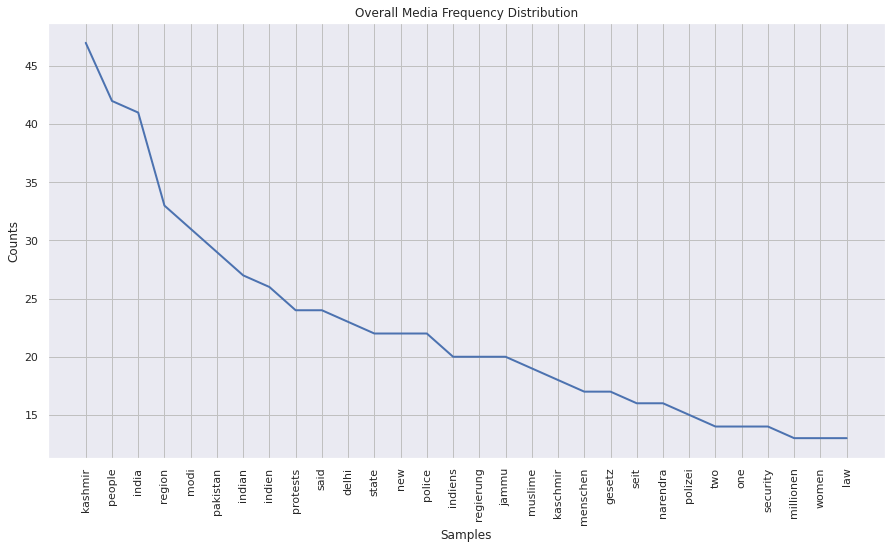

In [80]:
# Frequency distribution of all Articles
total_words_list = []
for i in range(articles_dataframe.shape[0]):
    for word in articles_dataframe['cleaned_tokenised_content'].iloc[i]:
        total_words_list.append(word)
fdist = FreqDist(total_words_list)
fig = plt.figure(figsize = (15,8))
fdist.plot(30,cumulative=False,title = 'Overall Media Frequency Distribution')
plt.show()
fig.savefig("./overall_media_freq_dist.png", bbox_inches = "tight")

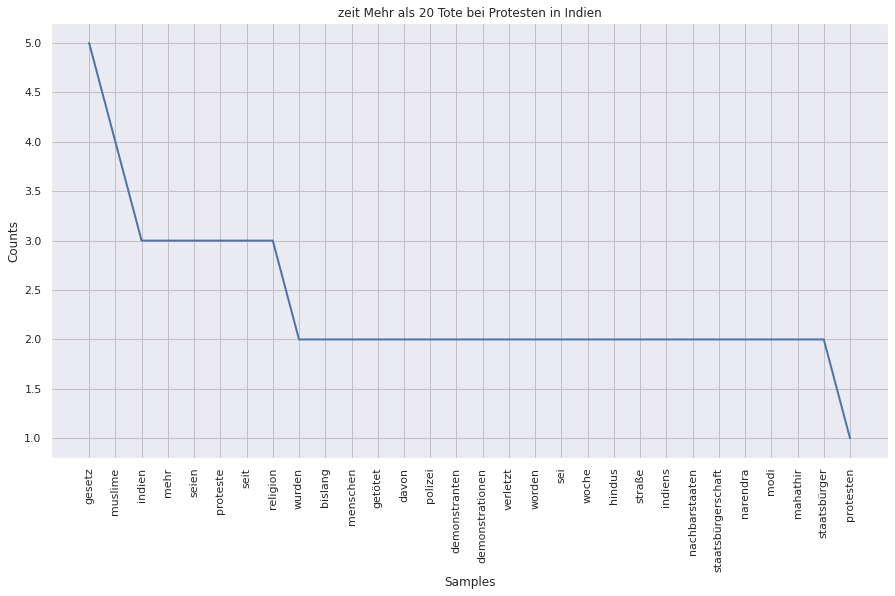

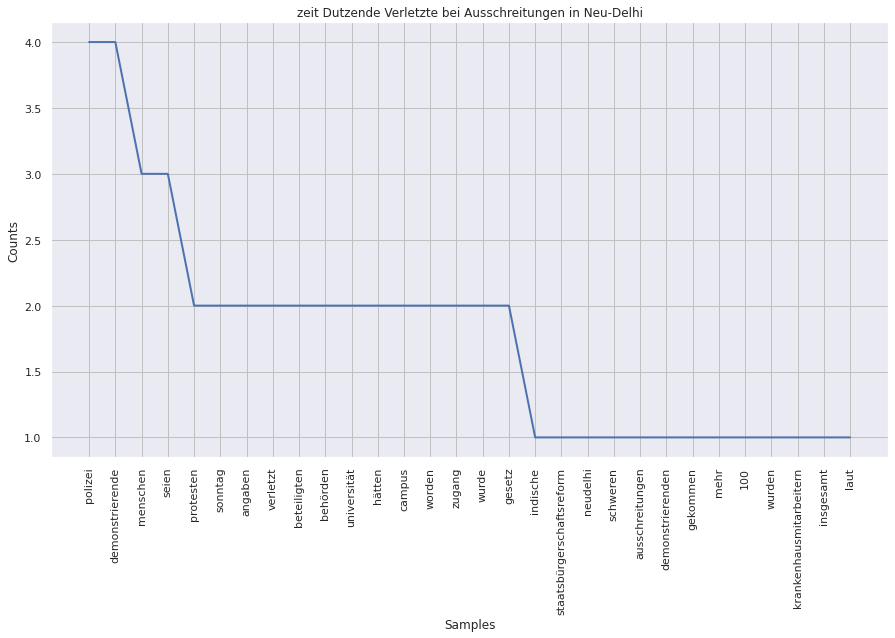

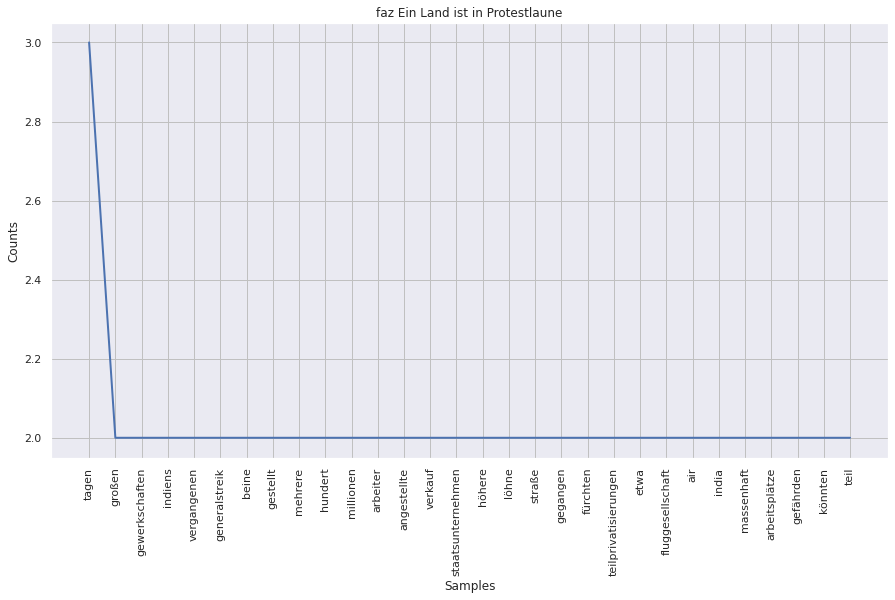

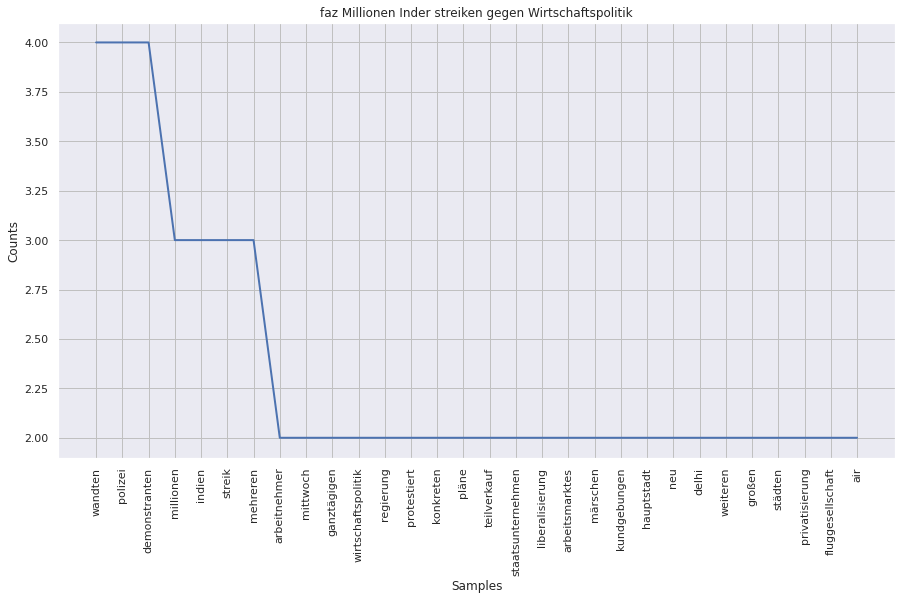

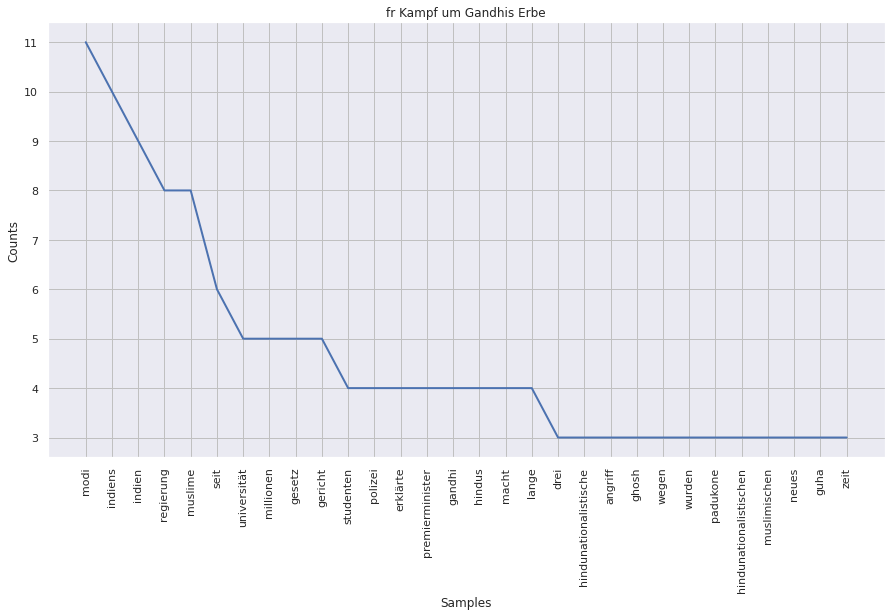

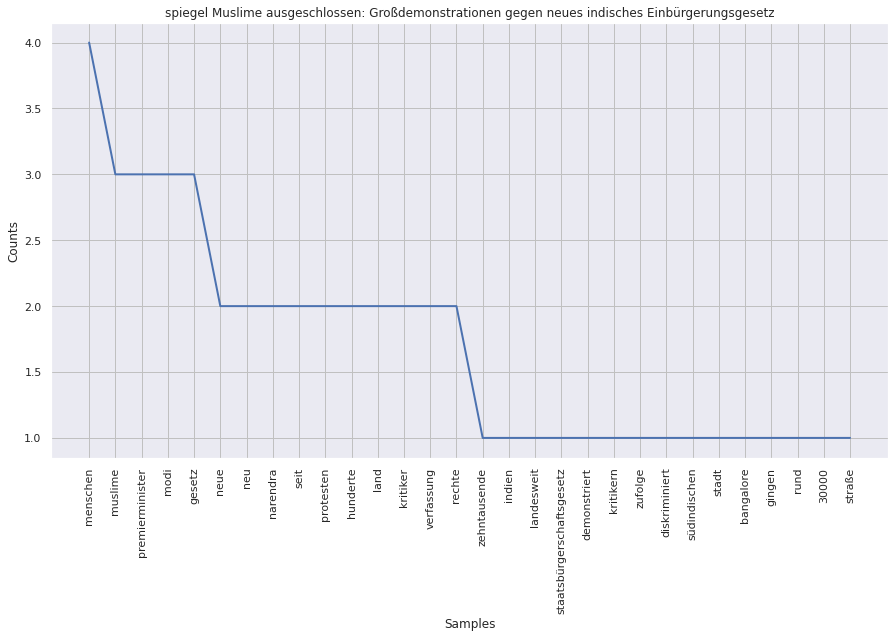

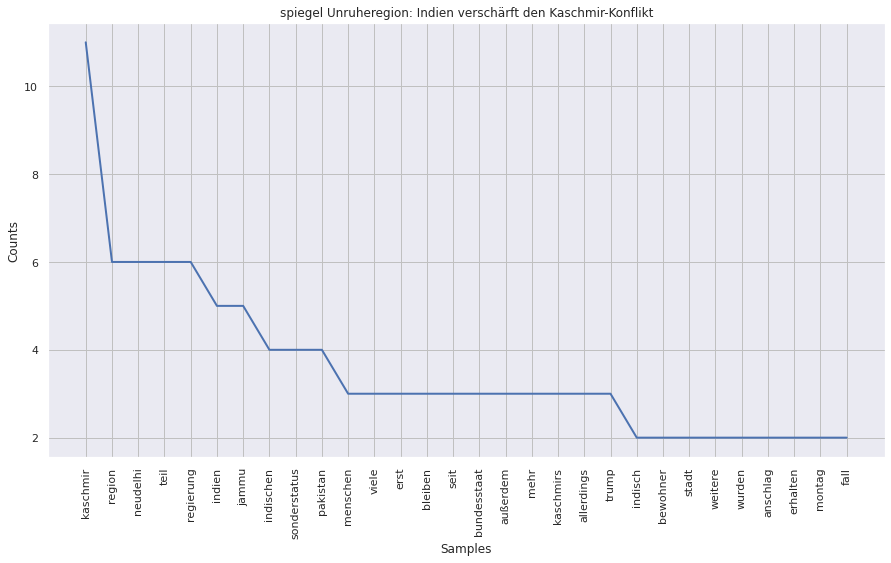

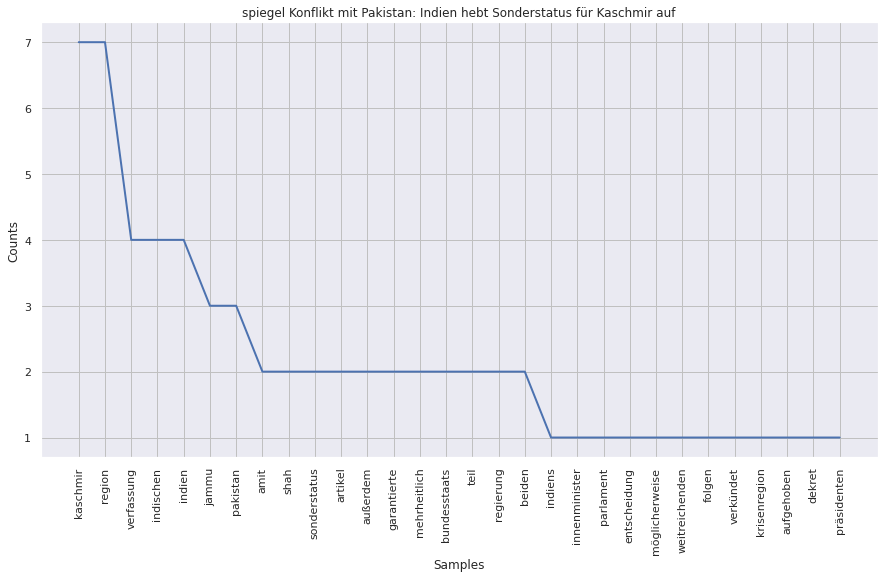

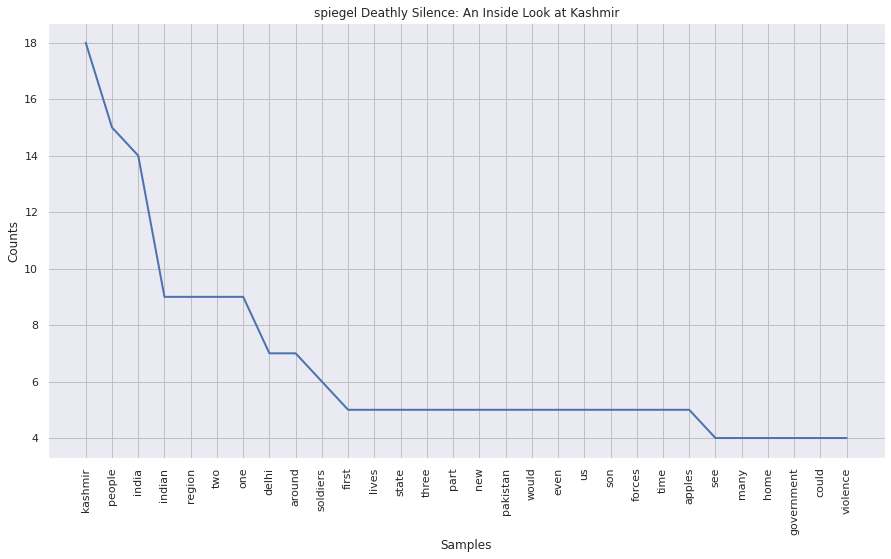

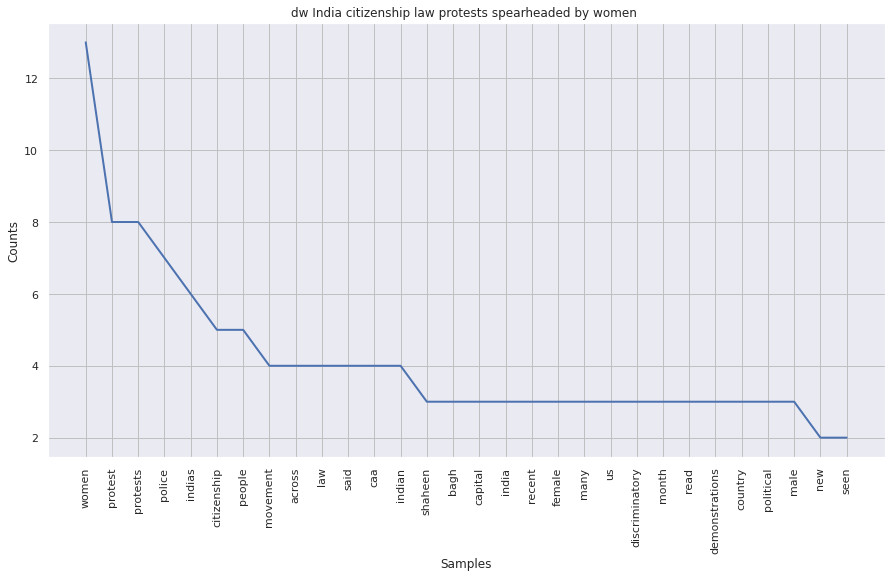

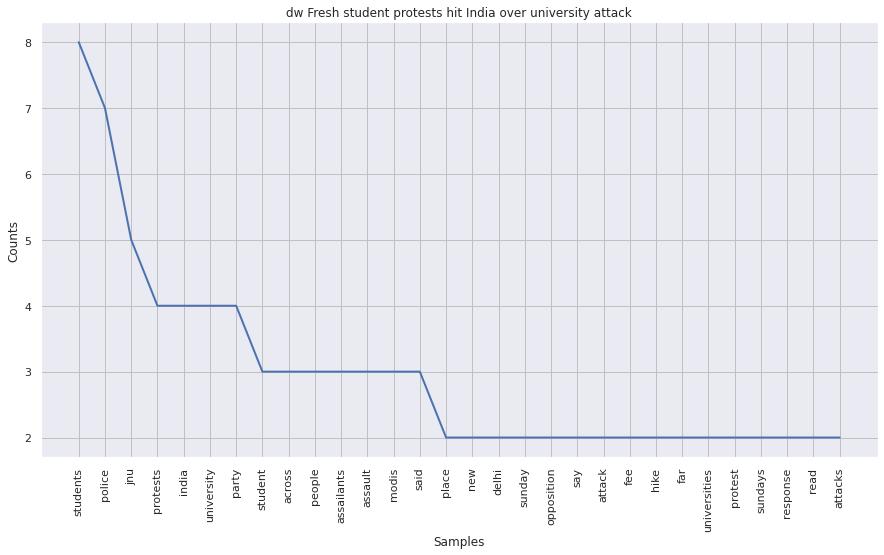

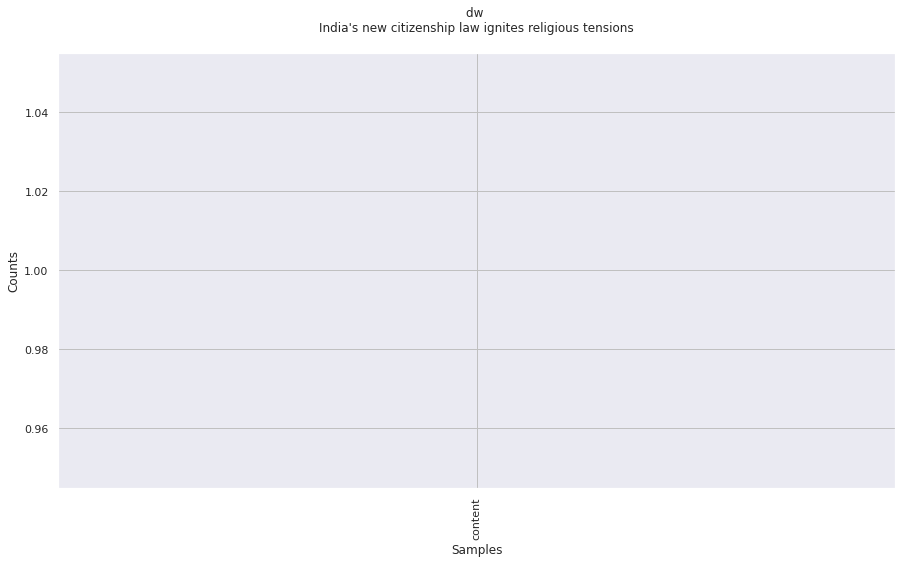

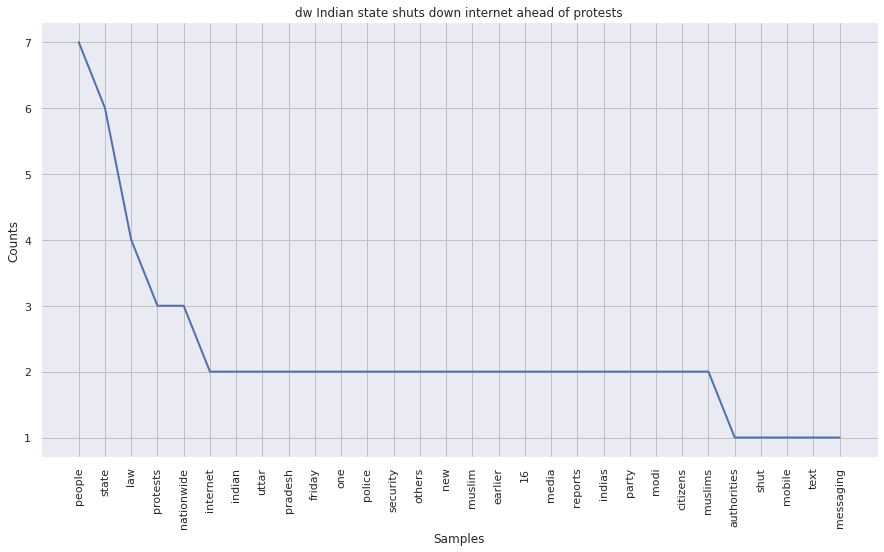

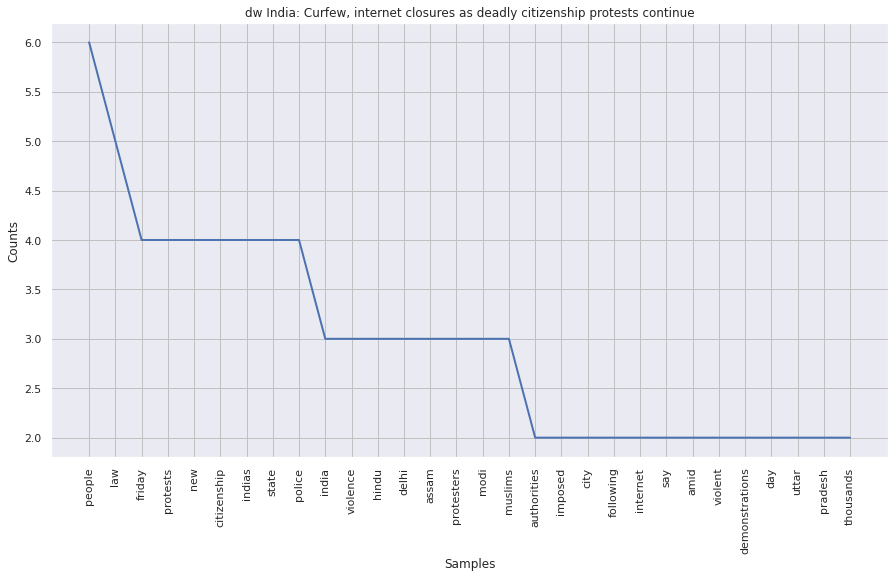

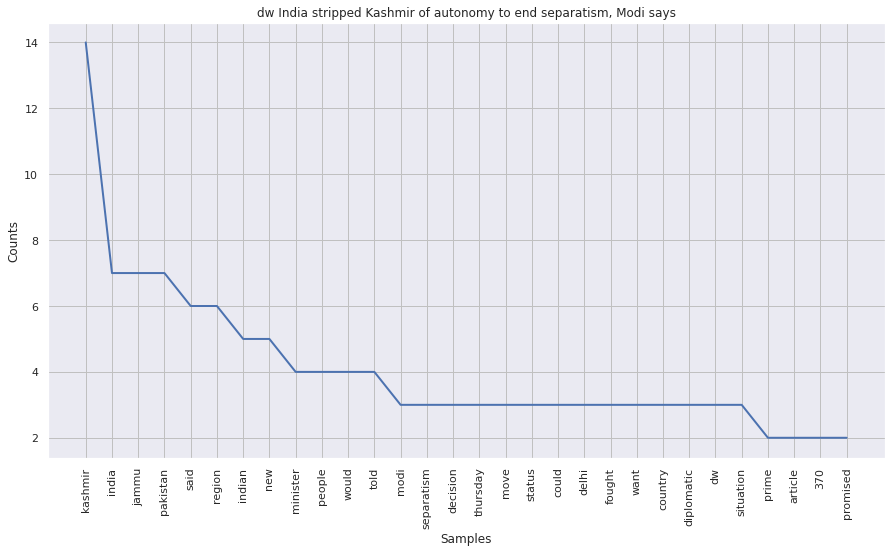

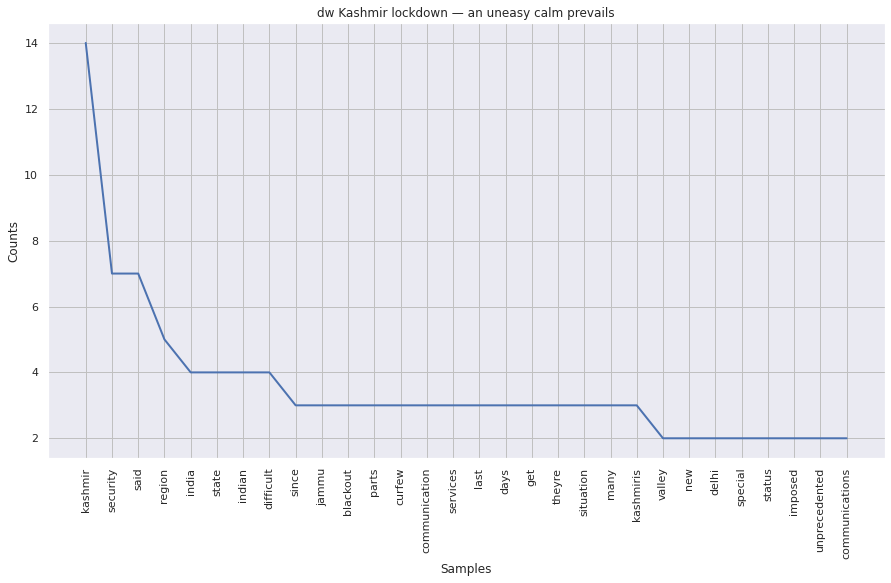

In [73]:
# Frequency distribution in an Article

for i in range(articles_dataframe.shape[0]):
    tokenized_word = articles_dataframe['cleaned_tokenised_content'].iloc[i]
    fdist = FreqDist(tokenized_word)
    fig = plt.figure(figsize = (15,8))
    fdist.plot(30,cumulative=False,title = articles_dataframe['media'].iloc[i]+" "+articles_dataframe['title'].iloc[i])
    plt.show()
    fig.savefig("./"+articles_dataframe['media'].iloc[i]+"_"+str(i)+".png", bbox_inches = "tight")

In [21]:
def create_ngrams(sentences_token, n):
    ngrams_list = []
    for sentence in sentences_token:
        if type(sentence) != list:
            grams = list(ngrams(ast.literal_eval(sentence),n))
        else :
            grams = list(ngrams(sentence,n))
        ngrams_list.append(grams)
    return ngrams_list


def ngram_counter(ngram_list,n):

    total_ngrams_list = []
    for ngram in ngram_list:
        for gram in ngram:
            total_ngrams_list.append(gram)
    ngram_counter = Counter(total_ngrams_list)
    most_used_ngram_counter = ngram_counter.most_common(n)

    return total_ngrams_list,ngram_counter , most_used_ngram_counter


def combine_ngrams(ngram_list):    
    total_combined_ngram_list = []
    for ngrams in ngram_list:
        combined_ngram_list = []
        for ngram in ngrams :
            combined_ngram_list.append('_'.join(str(v) for v in ngram))
        total_combined_ngram_list.append(combined_ngram_list)
    return total_combined_ngram_list

In [22]:
content = articles_dataframe['cleaned_tokenised_content']
summary = articles_dataframe['cleaned_tokenised_summary']
content_bigram_list = create_ngrams(content, 2)
content_trigram_list = create_ngrams(content, 3)
summary_bigram_list = create_ngrams(summary, 2)
summary_trigram_list = create_ngrams(summary, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


In [23]:
total_content_bigrams_list , bigram_counter , most_used_bigram_counter = ngram_counter(content_bigram_list,50)
total_content_trigrams_list , trigram_counter , most_used_trigram_counter = ngram_counter(content_trigram_list,50)
total_summary_bigrams_list , query_bigram_counter , query_most_used_bigram_counter = ngram_counter(summary_bigram_list,50)
total_summary_trigrams_list , query_trigram_counter , query_most_used_trigram_counter = ngram_counter(summary_trigram_list,50)

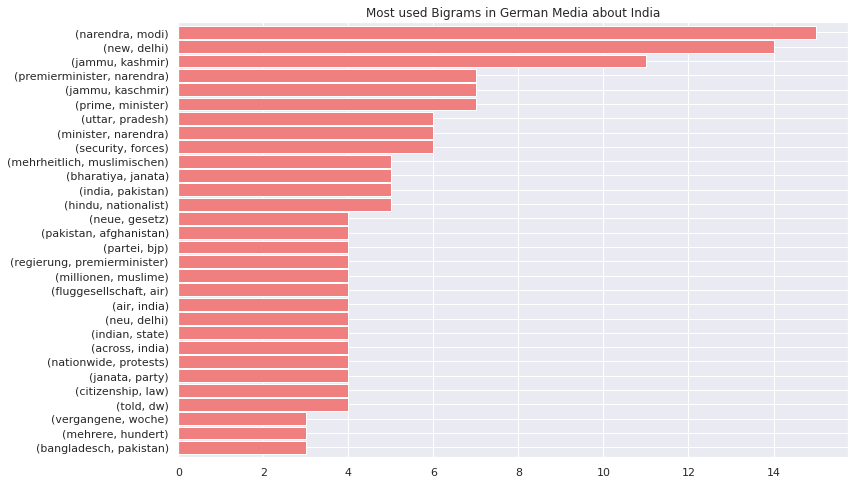

In [24]:
most_used_bigram = bigram_counter.most_common(30)
most_used_bigram = dict(most_used_bigram)
bigrams_series = pd.Series(most_used_bigram)
fig_bigram = bigrams_series.sort_values().plot.barh(color='lightcoral', width=.9, figsize=(12, 8),title='Most used Bigrams in German Media about India')
fig_bigram.figure.savefig('./media_bigram.png')

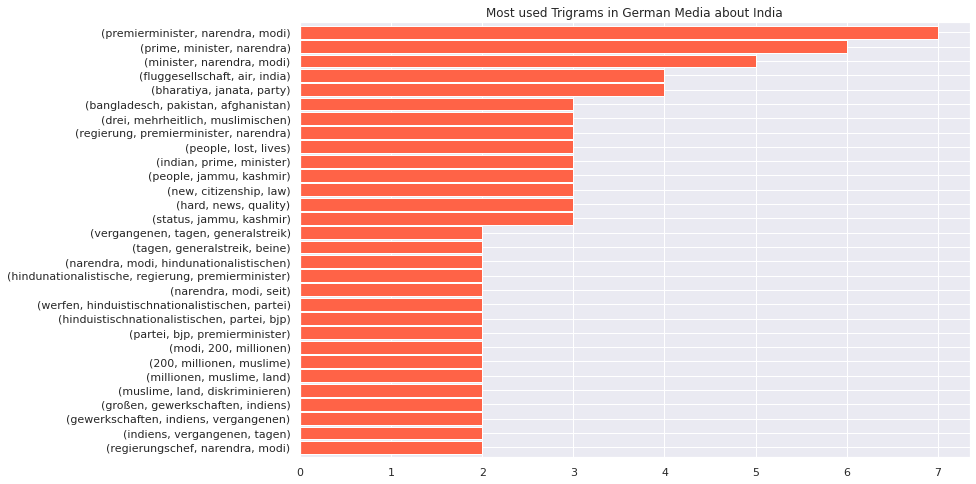

In [25]:
most_used_trigram = trigram_counter.most_common(30)
most_used_trigram = dict(most_used_trigram)
trigrams_series = pd.Series(most_used_trigram)
fig_trigram = trigrams_series.sort_values().plot.barh(color='tomato', width=.9, figsize=(12, 8),title='Most used Trigrams in German Media about India')
fig_trigram.figure.savefig('./media_trigram.png')

### Media word cloud for understanding the overall topics 

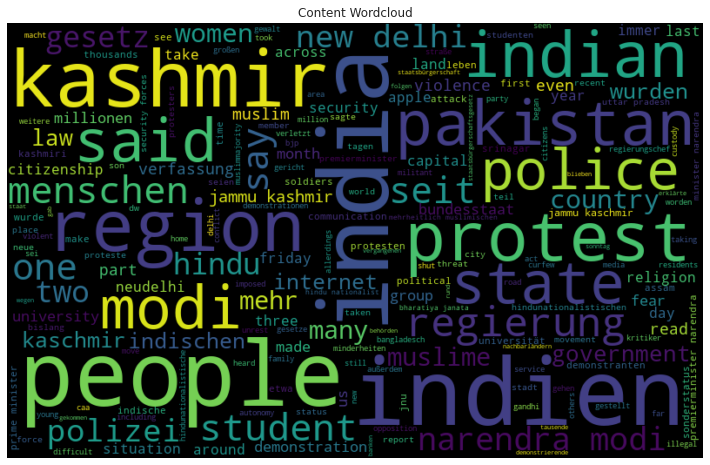

In [26]:
contentcloud=' '.join([i for i in articles_dataframe['joined_content']])
wordcloud = WordCloud(width=800, height=500, random_state=22, max_font_size=110).generate(contentcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Content Wordcloud')
plt.axis('off')
plt.savefig("./contentcloud.png")
plt.show()

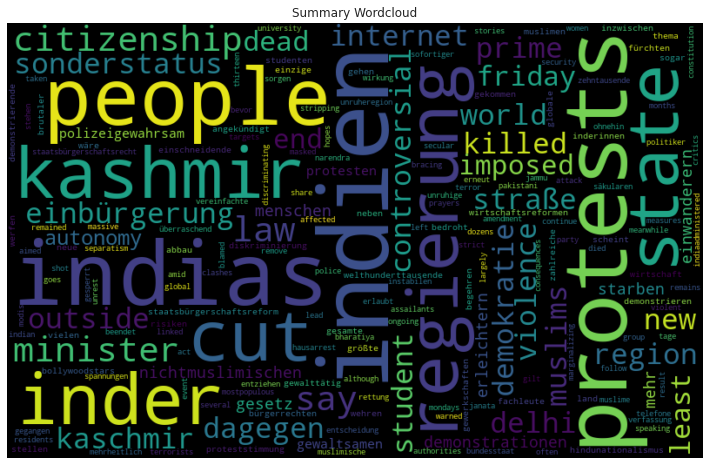

In [27]:
summarycloud=' '.join([i for i in articles_dataframe['joined_summary']])
wordcloud = WordCloud(width=800, height=500, random_state=22, max_font_size=110).generate(summarycloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Summary Wordcloud')
plt.axis('off')
plt.savefig("./summarycloud.png")
plt.show()

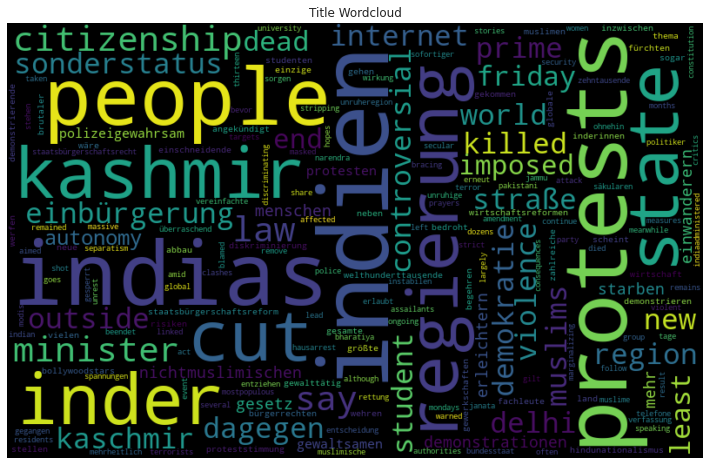

In [29]:
titlecloud=' '.join([i for i in articles_dataframe['joined_title']])
wordcloud = WordCloud(width=800, height=500, random_state=22, max_font_size=110).generate(summarycloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Title Wordcloud')
plt.axis('off')
plt.savefig("./titlecloud.png")
plt.show()

### Sentiment Analysis

In [31]:
def sentiment_transformer(text):

    model = SentimentModel()

    result = model.predict_sentiment(text)
    print(result)

    return result

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
text = articles_dataframe['summary'].iloc[8]
analyzer.polarity_scores(text)


{'compound': -0.8591, 'neg': 0.335, 'neu': 0.602, 'pos': 0.063}

In [34]:
text = articles_dataframe['summary'].iloc[1]
sentences = sent_tokenize(text)
sentiment_transformer(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



['neutral', 'neutral']


['neutral', 'neutral']

### Media Specific Unigram, Bigram and Trigram Analysis

In [36]:
articles_dataframe.to_csv('german_media.csv',index=False)

In [37]:
media_group = articles_dataframe.groupby('media')

In [38]:
dw_df = media_group.get_group('dw')
zeit_df = media_group.get_group('zeit')
faz_df = media_group.get_group('faz')
fr_df = media_group.get_group('fr')
spiegel_df = media_group.get_group('spiegel')

In [77]:
media_list = ['DW','ZEIT','FAZ','FR',"SPIEGEL"]

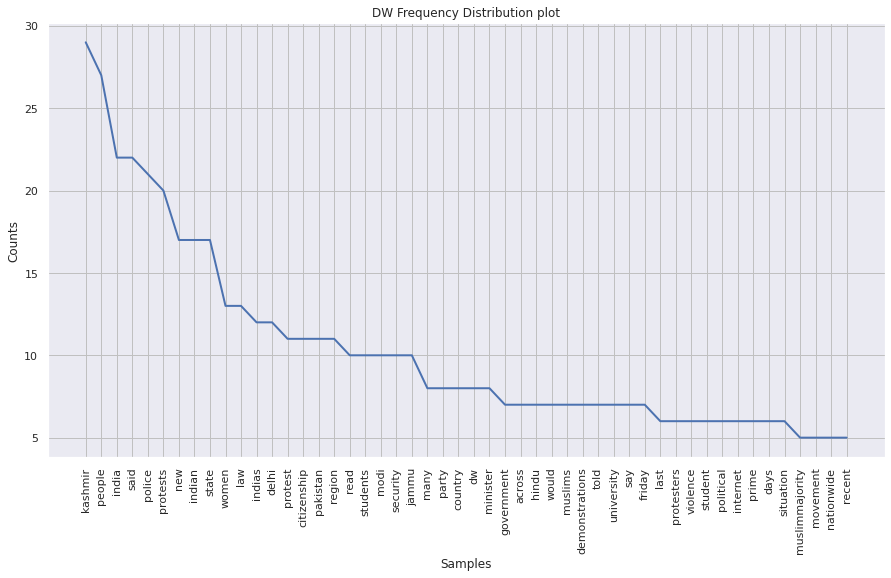

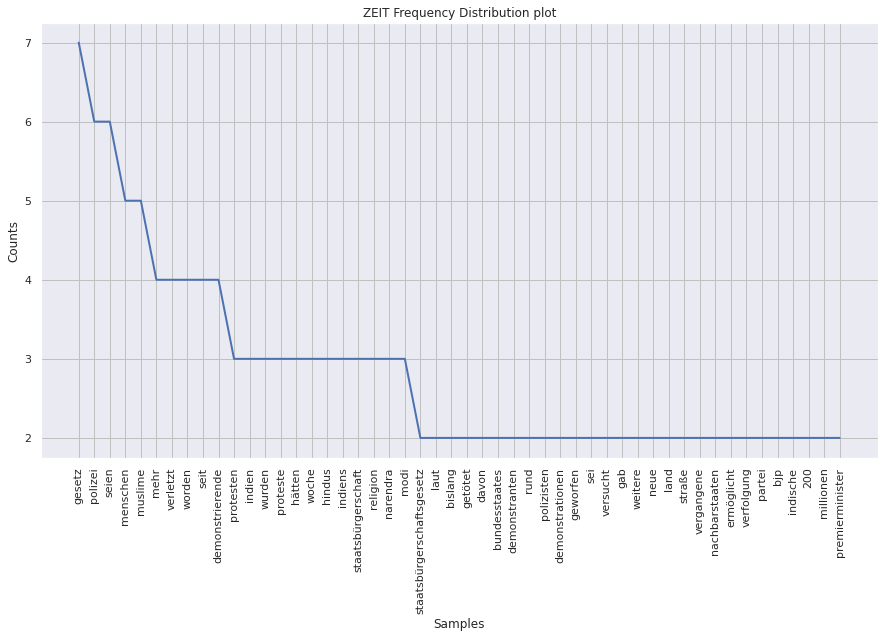

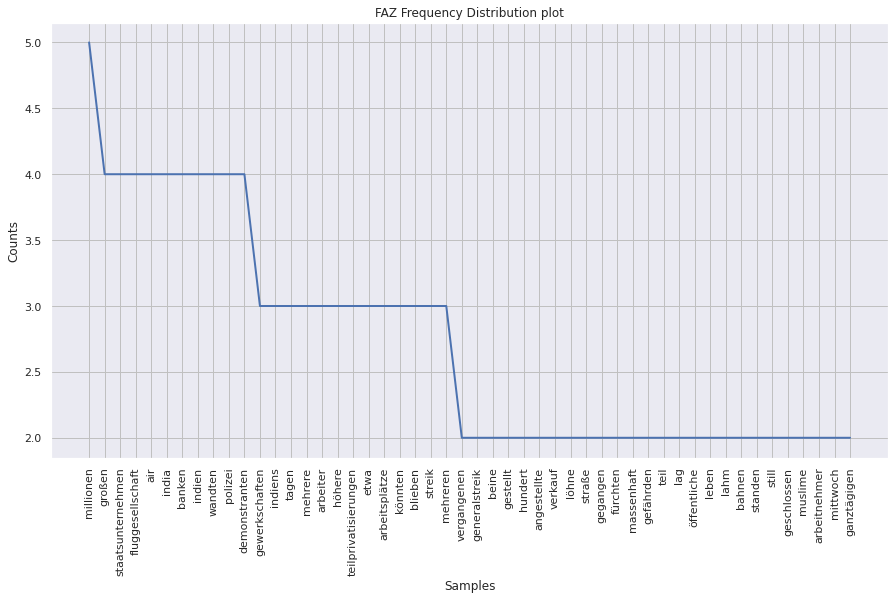

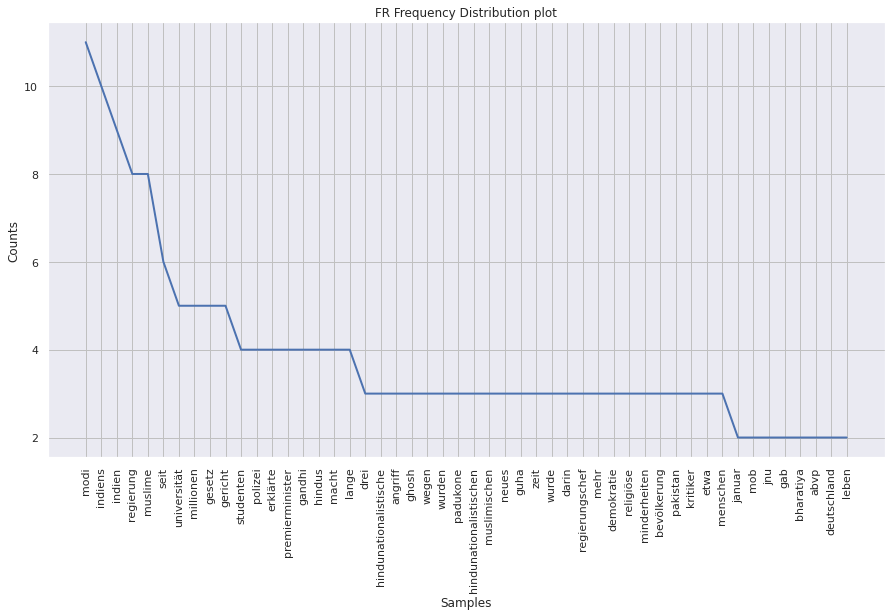

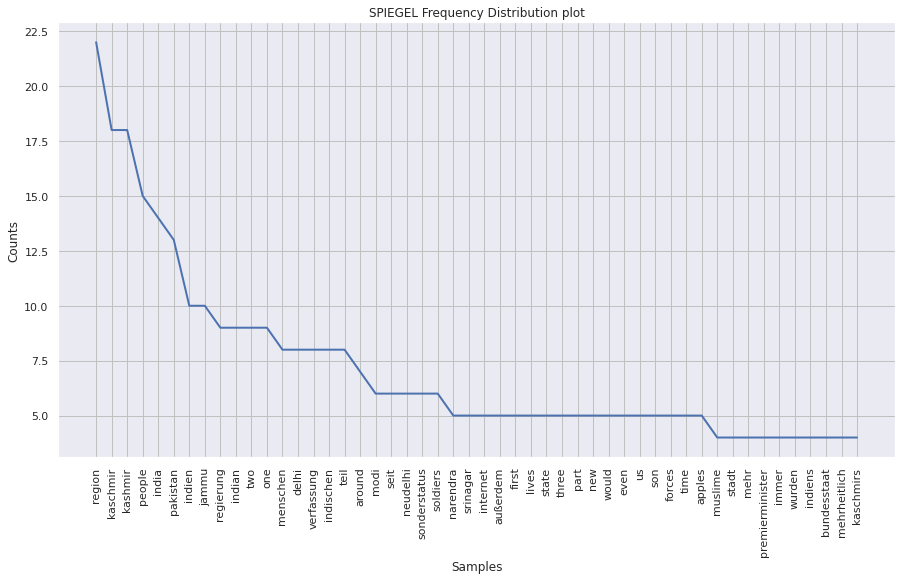

In [78]:
def freq_dist_df(df,name):     
    word_list = []
    for i in range(df.shape[0]):
        for word in df['cleaned_tokenised_content'].iloc[i]:
            word_list.append(word)
    fdist = FreqDist(word_list)
    fig = plt.figure(figsize = (15,8))
    fdist.plot(50,cumulative=False,title = name+" Frequency Distribution plot")
    plt.show()
    fig.savefig("./"+name+"_freq_dist.png", bbox_inches = "tight")

freq_dist_df(dw_df,'DW')
freq_dist_df(zeit_df,'ZEIT')
freq_dist_df(faz_df,'FAZ')
freq_dist_df(fr_df,'FR')
freq_dist_df(spiegel_df,'SPIEGEL')


In [39]:
 def grams_plot(df, name):   
    content = df['cleaned_tokenised_content']
    summary = df['cleaned_tokenised_summary']
    content_bigram_list = create_ngrams(content, 2)
    content_trigram_list = create_ngrams(content, 3)
    summary_bigram_list = create_ngrams(summary, 2)
    summary_trigram_list = create_ngrams(summary, 3)

    total_content_bigrams_list , bigram_counter , most_used_bigram_counter = ngram_counter(content_bigram_list,50)
    total_content_trigrams_list , trigram_counter , most_used_trigram_counter = ngram_counter(content_trigram_list,50)
    total_summary_bigrams_list , query_bigram_counter , query_most_used_bigram_counter = ngram_counter(summary_bigram_list,50)
    total_summary_trigrams_list , query_trigram_counter , query_most_used_trigram_counter = ngram_counter(summary_trigram_list,50)


    most_used_bigram = bigram_counter.most_common(30)
    most_used_bigram = dict(most_used_bigram)
    bigrams_series = pd.Series(most_used_bigram)
    fig_bigram = bigrams_series.sort_values().plot.barh(color='lightcoral', width=.9, figsize=(12, 8),title='Most used Bigrams in '+name+'about India')
    fig_bigram.figure.savefig('./'+name+'_bigram.png')

    most_used_trigram = trigram_counter.most_common(30)
    most_used_trigram = dict(most_used_trigram)
    trigrams_series = pd.Series(most_used_trigram)
    fig_trigram = trigrams_series.sort_values().plot.barh(color='tomato', width=.9, figsize=(12, 8),title='Most used Trigrams in '+name+'about India')
    fig_trigram.figure.savefig('./'+name+'_trigram.png')

    return fig_bigram, fig_trigram

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


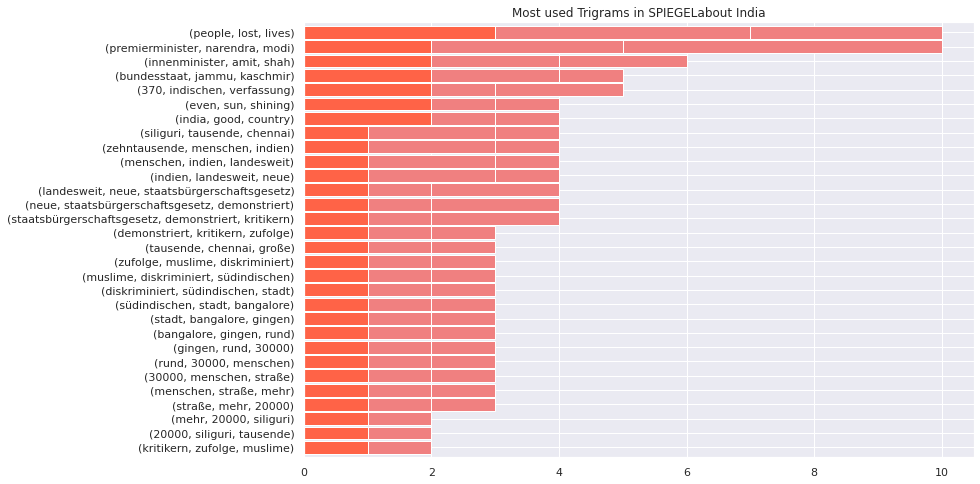

In [40]:
dw_bigram, dw_trigram = grams_plot(dw_df,'DW')
zeit_bigram, zeit_trigram = grams_plot(zeit_df,'ZEIT')
faz_bigram, faz_trigram = grams_plot(faz_df,'FAZ')
fr_bigram, fr_trigram = grams_plot(fr_df,'FR')
spiegel_bigram, spiegel_trigram = grams_plot(spiegel_df,'SPIEGEL')

### Clustering

In [45]:
content = list(articles_dataframe['joined_content'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)

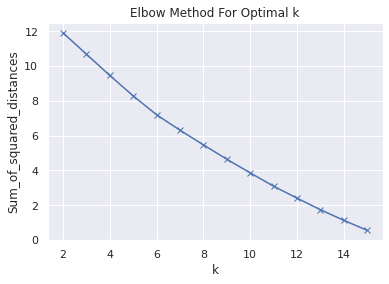

In [48]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,16)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(labels),columns=['cluster'])
print(wiki_cl.sort_values(by=['cluster']))

    cluster
9         0
10        0
12        0
13        0
0         1
1         1
4         1
5         1
11        1
6         2
7         2
2         3
3         3
8         4
14        4
15        4


Cluster: 0
Media
 dw
 dw
 dw
 dw


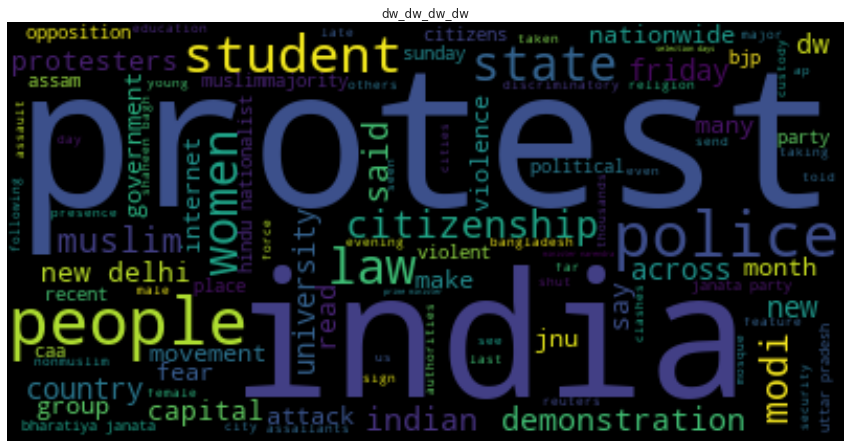

Cluster: 1
Media
    zeit
    zeit
      fr
 spiegel
      dw


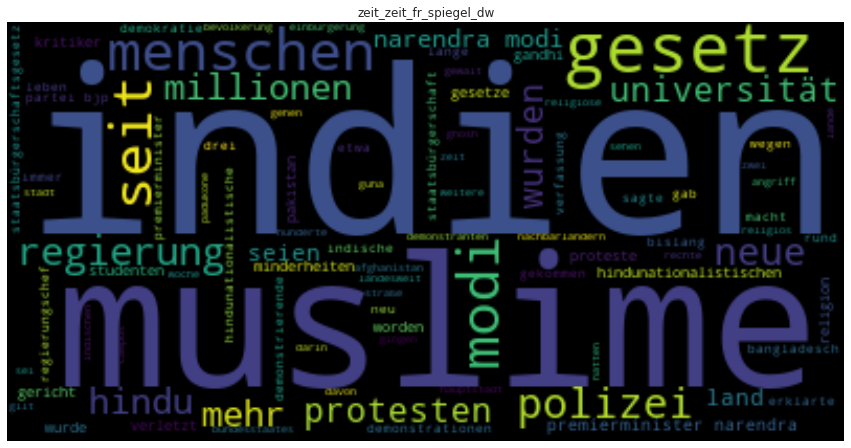

Cluster: 2
Media
 spiegel
 spiegel


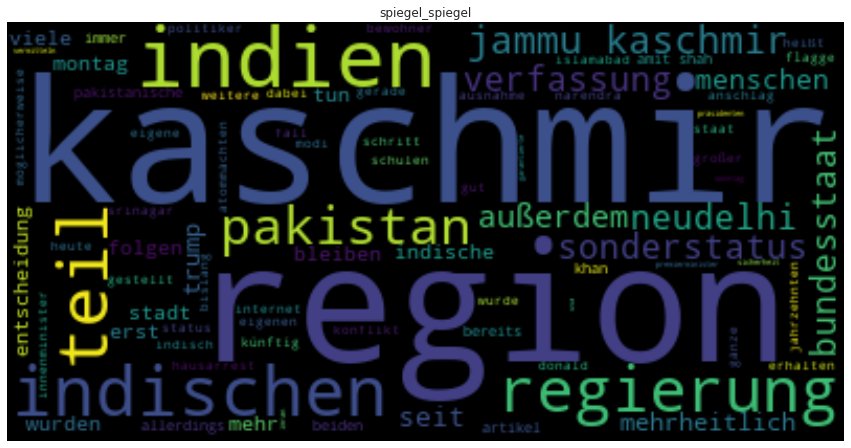

Cluster: 3
Media
 faz
 faz


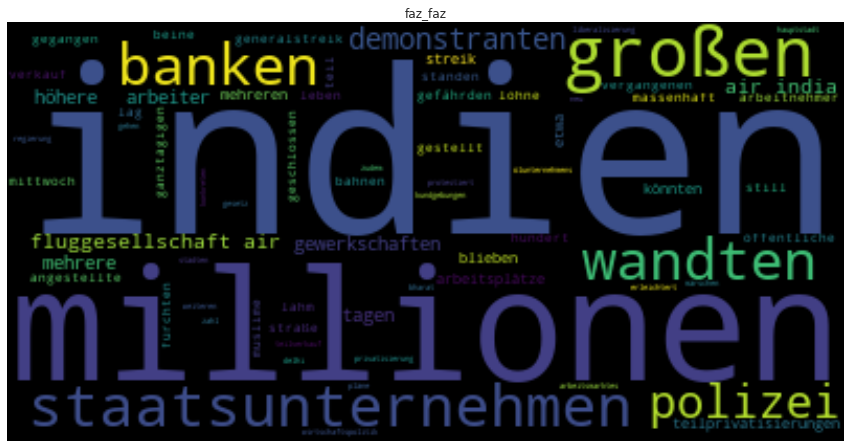

Cluster: 4
Media
 spiegel
      dw
      dw


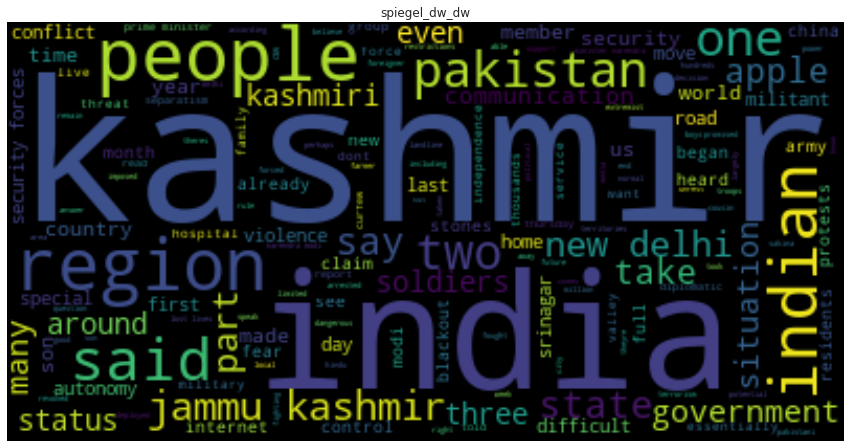

In [55]:
'''
Unsupervised k means clustering to find the documents with similar words usinf TF-IDF based on the media articles.

Similar topics covered based on media.
'''
result={'cluster':labels,'content':content,'media':list(articles_dataframe['media'])}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['content'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=110, max_words=200, random_state=22 ).generate(text)
    print('Cluster: {}'.format(k))
    print('Media')
    media=result[result.cluster==k]['media']
    title_name = "_".join(list(media))
    print(media.to_string(index=False))
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title_name)
    plt.axis("off")
    plt.savefig("./"+title_name+"cloud.png")
    plt.show()
